In [22]:
import torch
import sys
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import librosa
from scipy import signal
from scipy.io import wavfile
import IPython.display as ipd
import librosa.display

from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split

print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
#! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
# call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
#print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
#print ('Current cuda device ', torch.cuda.current_device())

import numpy
import numpy as np

use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
Tensor = FloatTensor

import pandas
import pandas as pd

import logging
handler=logging.basicConfig(level=logging.INFO)
lgr = logging.getLogger(__name__)
%matplotlib inline

# !pip install psutil
import psutil
import os
def cpuStats():
        print(sys.version)
        print(psutil.cpu_percent())
        print(psutil.virtual_memory())  # physical memory usage
        pid = os.getpid()
        py = psutil.Process(pid)
        memoryUse = py.memory_info()[0] / 2. ** 30  # memory use in GB...I think
        print('memory GB:', memoryUse)

cpuStats()

__Python VERSION: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
__pyTorch VERSION: 1.3.1+cpu
__CUDA VERSION
__CUDNN VERSION: None
__Number CUDA Devices: 0
__Devices
Available devices  0
3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
46.8
svmem(total=8471379968, available=4215734272, percent=50.2, used=4255645696, free=4215734272)
memory GB: 0.40383148193359375


In [27]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
use_cuda = torch.cuda.is_available()
# use_cuda = False

FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
Tensor = FloatTensor

In [3]:
DATA_ROOT ='G:/tensorflow-speech-recognition-challenge/'
IMG_PATH  = DATA_ROOT + '/train/train/pict/'
IMG_EXT = '.png'
IMG_DATA_LABELS = DATA_ROOT + '/train_v2.csv'

In [4]:
audio_path = 'G:/tensorflow-speech-recognition-challenge/train/train/audio/'
pict_Path = 'G:/tensorflow-speech-recognition-challenge/train/train/pict/'
test_pict_Path = 'G:/tensorflow-speech-recognition-challenge/test/test/pict/'
test_audio_path = 'G:/tensorflow-speech-recognition-challenge/test/test/audio/'

In [5]:
samples = []

if not os.path.exists(pict_Path):
    os.makedirs(pict_Path)

if not os.path.exists(test_pict_Path):
    os.makedirs(test_pict_Path)
    
subFolderList = []

for x in os.listdir(audio_path):
    if os.path.isdir(audio_path + '/' + x):
        subFolderList.append(x)
        if not os.path.exists(pict_Path + '/' + x):
            os.makedirs(pict_Path +'/'+ x)

In [8]:
# #### Function: convert audio to spectogram images
# import soundfile as sf
# from matplotlib import pyplot as plt

# def wav2img(wav_path, targetdir='', figsize=(4,4)):
#     """
#     takes in wave file path
#     and the fig size. Default 4,4 will make images 288 x 288
#     """
#     fs = 44100 # sampling frequency
    
#     # use soundfile library to read in the wave files
#     test_sound, samplerate = sf.read(wav_path)
    
#     # make the plot
#     fig = plt.figure(figsize=figsize)
#     S, freqs, bins, im = plt.specgram(test_sound, NFFT=1024, Fs=samplerate, noverlap=512)
#     plt.show
#     plt.axis('off')
    
#     ## create output path
#     output_file = wav_path.split('/')[-1].split('.wav')[0]
#     output_file = targetdir +'/'+ output_file
#     plt.savefig('%s.png' % output_file)
#     plt.close()


# def wav2img_waveform(wav_path, targetdir='', figsize=(4,4)):
#     test_sound, samplerate = sf.read(sample_audio[0])
#     fig = plt.figure(figsize=figsize)
#     plt.plot(test_sound)
#     plt.axis('off')
#     output_file = wav_path.split('/')[-1].split('.wav')[0]
#     output_file = targetdir +'/'+ output_file
#     plt.savefig('%s.png' % output_file)
#     plt.close()

# ### Convert Training Audio
# #### Loop through source audio and save as pictures 
# # (may take a while) may also consider running at commandline. 
# # Code is limited to 3 folders and 10 files each, get rid of array limits to process the entire directory

# # c:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7221: RuntimeWarning: divide by zero encountered in log10
# #   Z = 10. * np.log10(spec)

# for i, x in enumerate(subFolderList[-3:]):
#     print(i, ':', x)
#     # get all the wave files
#     all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
#     for j,file in enumerate(all_files):
#         if j%100 == 0:
#             print(f'Done for {j} out of {len(all_files)}.')
#         try:
#             wav2img(audio_path + x + '/' + file, pict_Path + x)                
#         except Exception:
#             print('Missed')

0 : yes
Done for 0 out of 2377.


C:\Users\arthu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7609: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Done for 100 out of 2377.
Done for 200 out of 2377.
Done for 300 out of 2377.
Done for 400 out of 2377.
Done for 500 out of 2377.
Done for 600 out of 2377.
Done for 700 out of 2377.
Done for 800 out of 2377.
Done for 900 out of 2377.
Done for 1000 out of 2377.
Done for 1100 out of 2377.
Done for 1200 out of 2377.
Done for 1300 out of 2377.
Done for 1400 out of 2377.
Done for 1500 out of 2377.
Done for 1600 out of 2377.
Done for 1700 out of 2377.
Done for 1800 out of 2377.
Done for 1900 out of 2377.
Done for 2000 out of 2377.
Done for 2100 out of 2377.
Done for 2200 out of 2377.
Done for 2300 out of 2377.
1 : zero
Done for 0 out of 2376.
Done for 100 out of 2376.
Done for 200 out of 2376.
Done for 300 out of 2376.
Done for 400 out of 2376.
Done for 500 out of 2376.
Done for 600 out of 2376.
Done for 700 out of 2376.
Done for 800 out of 2376.
Done for 900 out of 2376.
Done for 1000 out of 2376.
Done for 1100 out of 2376.
Done for 1200 out of 2376.
Done for 1300 out of 2376.
Done for 1400

In [9]:
train_audio_path = audio_path
filename = 'wow/4a0e2c16_nohash_0.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
ipd.Audio(samples, rate=sample_rate)

In [10]:
# from sklearn.preprocessing import MultiLabelBinarizer, LabelBinarizer
# from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline
# from collections import defaultdict
# d = defaultdict(LabelEncoder)

# # Build the pictures path
# subFolderList = []
# for x in os.listdir(pict_Path):
#     if os.path.isdir(pict_Path + '/' + x):
#         subFolderList.append(x)        
            
# good_labels=['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
# POSSIBLE_LABELS = 'yes no up down left right on off stop go silence unknown'.split()

# # print (type(POSSIBLE_LABELS))
# # print (type(good_labels))
# columns = ['img', 'label-str','fullpath']
# df_pred=pd.DataFrame(data=np.zeros((0,len(columns))), columns=columns)
# # df_pred.id.astype(int)

# for i, x in enumerate(subFolderList):
#     if (x in POSSIBLE_LABELS):
#     #     print(i, ':', x)
#         # get all the wave files
#         all_files = [y for y in os.listdir(pict_Path + x) if '.png' in y]
#         for file in all_files:
#     #         print (audio_path + x + '/' + file, pict_Path + x)
#             fullPath=pict_Path + x + '/' + file
#     #         print (fullPath)
#             df_pred = df_pred.append({'img':file, 'label-str':x,'fullpath':fullPath},ignore_index=True)
#     #         print (pict_Path + x)    
    

# # Encode the categorical labels as numeric data
# df_pred['label'] = LabelEncoder().fit_transform(df_pred['label-str'])
# # Make sure we dont save the header
# df_pred.to_csv(IMG_DATA_LABELS, columns=('img','label-str','fullpath', 'label'), index=None, header=False)
# df_pred.to_csv(IMG_DATA_LABELS +'_header', columns=('img','label-str','fullpath', 'label'), index=None, header=True)
    
# df_pred.head(3)

,img,label-str,fullpath,label
0,00176480_nohash_0.png,down,G:/tensorflow-speech-recognition-challenge/tra...,0
1,004ae714_nohash_0.png,down,G:/tensorflow-speech-recognition-challenge/tra...,0
2,00b01445_nohash_0.png,down,G:/tensorflow-speech-recognition-challenge/tra...,0


In [14]:
import time
from sklearn.preprocessing import MultiLabelBinarizer, LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from collections import defaultdict
d = defaultdict(LabelEncoder)

def encode_onehot(df, cols):  
    vec = DictVectorizer()    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict(outtype='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df

try:
    from PIL import Image
except ImportError:
    import Image
    
class GenericImageDataset(Dataset):    

    def __init__(self, csv_path, img_path, img_ext, transform=None):
        
        t = time.time()        
        lgr.info('CSV path {}'.format(csv_path))
        lgr.info('IMG path {}'.format(img_path))        
        
        assert img_ext in ['.png']
        
        tmp_df = pd.read_csv(csv_path, header=None) # img,label,fullpath
                        
        self.mlb = MultiLabelBinarizer()
        self.img_path = img_path
        self.img_ext = img_ext
        self.transform = transform

        # Encoding the variables                
        lgr.info("DF CSV:\n" + str (tmp_df.head(3)))
                        
        self.X_train = tmp_df[2]        
        
        self.y_train = self.mlb.fit_transform(tmp_df[1].str.split()).astype(np.float32)           
        self.y_train=self.y_train.reshape((self.y_train.shape[0]*10,1)) # Must be reshaped for PyTorch!                
        
#         y_df = encode_onehot(tmp_df, cols=[tmp_df[1]])
#         self.y_train = y_df 
        
        lgr.info('y_train {}'.format(self.y_train))
                
#         self.y_train = tmp_df[3].astype(np.float32)                          
#         self.y_train = self.mlb.fit_transform(tmp_df[1].str.split()).astype(np.float32)
#         self.y_train = tmp_df[3].astype(np.float32)       
#         d = defaultdict(LabelEncoder)
#         self.y_train =tmp_df[1].apply(lambda x: d[x].fit_transform(x))
    
#         tmp_df=one_hot(tmp_df,tmp_df[1])
#         self.y_train = tmp_df[1].astype(np.float32)       
#         encoder = LabelEncoder()
#         encoder.fit(tmp_df[1])
#         self.y_train = encoder.transform(tmp_df[1]).astype(np.float32)
#         self.y_train=self.y_train.reshape((self.y_train.shape[0],1)) # Must be reshaped for PyTorch!
                
        lgr.info('[*]Dataset loading time {}'.format(time.time() - t))
        lgr.info('[*] Data size is {}'.format(len(self)))
        
        lgr.info("DF CSV:\n" + str (tmp_df.head(5)))
        
        print ()

    def __getitem__(self, index):
#         lgr.info ("__getitem__:" + str(index))
        path=self.img_path + self.X_train[index]
        path=self.X_train[index]
#         lgr.info (" --- get item path:" + path)
        img = Image.open(path)
        img = img.convert('RGB')
        if self.transform is not None: # TypeError: batch must contain tensors, numbers, or lists; 
                                     #found <class 'PIL.Image.Image'>
            img = self.transform(img)
#             print (str (type(img))) # <class 'torch.FloatTensor'>                
#         label = torch.from_numpy(self.y_train[index])
        label = (self.y_train[index])
        return img, label

    def __len__(self):
        l=len(self.X_train.index)
#         lgr.info ("Lenght:" +str(l))
        return (l)       

    @staticmethod        
    def imshow(img):
        img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

    @staticmethod    
    def flaotTensorToImage(img, mean=0, std=1):
        """convert a tensor to an image"""
        img = np.transpose(img.numpy(), (1, 2, 0))
        img = (img*std+ mean)*255
        img = img.astype(np.uint8)    
        return img    
    
    @staticmethod
    def toTensor(img):
        """convert a numpy array of shape HWC to CHW tensor"""
        img = img.transpose((2, 0, 1)).astype(np.float32)
        tensor = torch.from_numpy(img).float()
        return tensor/255.0  

In [15]:
transformations = transforms.Compose([transforms.ToTensor()])

In [23]:
dset_train = GenericImageDataset(IMG_DATA_LABELS,IMG_PATH,IMG_EXT,transformations)

INFO:__main__:CSV path G:/tensorflow-speech-recognition-challenge//train_v2.csv
INFO:__main__:IMG path G:/tensorflow-speech-recognition-challenge//train/train/pict/
INFO:__main__:DF CSV:
                       0     1  \
0  00176480_nohash_0.png  down   
1  004ae714_nohash_0.png  down   
2  00b01445_nohash_0.png  down   

                                                   2  3  
0  G:/tensorflow-speech-recognition-challenge/tra...  0  
1  G:/tensorflow-speech-recognition-challenge/tra...  0  
2  G:/tensorflow-speech-recognition-challenge/tra...  0  
INFO:__main__:y_train [[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]
INFO:__main__:[*]Dataset loading time 0.1310265064239502
INFO:__main__:[*] Data size is 23682
INFO:__main__:DF CSV:
                       0     1  \
0  00176480_nohash_0.png  down   
1  004ae714_nohash_0.png  down   
2  00b01445_nohash_0.png  down   
3  00b01445_nohash_1.png  down   
4  00f0204f_nohash_0.png  down   

                                                   2  3  
0

In [24]:
batch_size = 16 # on GTX 1080
global_epoches = 10
LR = 0.0005
MOMENTUM = 0.95
validationRatio=0.11    

class FullTrainningDataset(torch.utils.data.Dataset):
    def __init__(self, full_ds, offset, length):
        self.full_ds = full_ds
        self.offset = offset
        self.length = length
        assert len(full_ds)>=offset+length, Exception("Parent Dataset not long enough")
        super(FullTrainningDataset, self).__init__()
        
    def __len__(self):
        return self.length
    
    def __getitem__(self, i):
        return self.full_ds[i+self.offset]
    


def trainTestSplit(dataset, val_share=validationRatio):
    val_offset = int(len(dataset)*(1-val_share))
    print("Offest:" + str(val_offset))
    return FullTrainningDataset(dataset, 0, val_offset), FullTrainningDataset(dataset, val_offset, len(dataset)-val_offset)

 
train_ds, val_ds = trainTestSplit(dset_train)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=False, num_workers=0)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=0)

print(train_loader)
print(val_loader)

Offest:21076


INFO:__main__:i=0: 
INFO:__main__:i=1: 
INFO:__main__:i=2: 
INFO:__main__:i=3: 


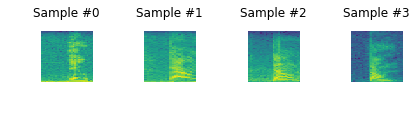

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

imagesToShow=4

for i, data in enumerate(train_loader, 0):
    lgr.info('i=%d: '%(i))            
    images, labels = data            
    num = len(images)
    
    ax = plt.subplot(1, imagesToShow, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    
    for n in range(num):
        image=images[n]
        label=labels[n]
        plt.imshow (GenericImageDataset.flaotTensorToImage(image))
        
    if i==imagesToShow-1:
        break    

In [30]:
dropout = torch.nn.Dropout(p=0.30)
class ConvRes(nn.Module):
    def __init__(self, insize, outsize):
        super(ConvRes, self).__init__()
        drate = .3
        self.math = nn.Sequential(
            nn.BatchNorm2d(insize),
            # nn.Dropout(drate),
            torch.nn.Conv2d(insize, outsize, kernel_size=2, padding=2),
            nn.PReLU(),
        )

    def forward(self, x):
        return self.math(x)


class ConvCNN(nn.Module):
    def __init__(self, insize, outsize, kernel_size=7, padding=2, pool=2, avg=True):
        super(ConvCNN, self).__init__()
        self.avg = avg
        self.math = torch.nn.Sequential(
            torch.nn.Conv2d(insize, outsize, kernel_size=kernel_size, padding=padding),
            torch.nn.BatchNorm2d(outsize),
            torch.nn.LeakyReLU(),
            torch.nn.MaxPool2d(pool, pool),
        )
        self.avgpool = torch.nn.AvgPool2d(pool, pool)

    def forward(self, x):
        x = self.math(x)
        if self.avg is True:
            x = self.avgpool(x)
        return x


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.avgpool = nn.AdaptiveAvgPool2d(1)

        self.cnn1 = ConvCNN(3, 32, kernel_size=7, pool=4, avg=False)
        self.cnn2 = ConvCNN(32, 32, kernel_size=5, pool=2, avg=True)
        self.cnn3 = ConvCNN(32, 32, kernel_size=5, pool=2, avg=True)

        self.res1 = ConvRes(32, 64)

        self.features = nn.Sequential(
            self.cnn1, dropout,
            self.cnn2,
            self.cnn3,
            self.res1,
        )

        self.classifier = torch.nn.Sequential(
            nn.Linear(3136, 1),
        )
        self.sig = nn.Sigmoid()
  
    def forward(self, x):
        x = self.features(x)
#         print (x.data.shape)
        x = x.view(x.size(0), -1)
#         print (x.data.shape)
        x = self.classifier(x)
#         print (x.data.shape)
        x = self.sig(x)
        return x

    
if use_cuda:
    lgr.info ("Using the GPU")
    model = Net().cuda() # On GPU
else:
    lgr.info ("Using the CPU")
    model = Net() # On CPU

lgr.info('Model {}'.format(model))

INFO:__main__:Using the CPU
INFO:__main__:Model Net(
  (avgpool): AdaptiveAvgPool2d(output_size=1)
  (cnn1): ConvCNN(
    (math): Sequential(
      (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(2, 2))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AvgPool2d(kernel_size=4, stride=4, padding=0)
  )
  (cnn2): ConvCNN(
    (math): Sequential(
      (0): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (cnn3): ConvCNN(
    (math): Sequential(
      (0): Conv2d(32, 32, kernel_size=(

In [39]:
loss_func=torch.nn.BCELoss()
loss_func = nn.MultiLabelSoftMarginLoss()
# loss_func = torch.nn.CrossEntropyLoss()
# NN params
LR = 0.005
MOMENTUM= 0.9
optimizer = torch.optim.Adam(model.parameters(), lr=LR,weight_decay=5e-5) #  L2 regularization
if use_cuda:
    lgr.info ("Using the GPU")    
    model.cuda()
    loss_func.cuda()

lgr.info (optimizer)
lgr.info (loss_func)

INFO:__main__:Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.005
    weight_decay: 5e-05
)
INFO:__main__:MultiLabelSoftMarginLoss()


In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
    
clf=model 
opt= optimizer
loss_history = []
acc_history = []
 
def train(epoch):
    clf.train() # set model in training mode (need this because of dropout)
     
    # dataset API gives us pythonic batching 
    for batch_idx, (data, target) in enumerate(train_loader):
        
        if use_cuda:
            pass
            #data, target = Variable(data.cuda(async=True)), Variable(target.cuda(async=True)) # On GPU                
        else:            
            data, target = Variable(data), Variable(target) # RuntimeError: expected CPU tensor (got CUDA tensor)                           
                 
        # forward pass, calculate loss and backprop!
        opt.zero_grad()
        preds = clf(data)
        if use_cuda:
            loss = loss_func(preds, target).cuda()
#             loss = F.log_softmax(preds).cuda() # TypeError: log_softmax() takes exactly 1 argument (2 given)
#             loss = F.nll_loss(preds, target).cuda() # https://github.com/torch/cutorch/issues/227
            
        else:
            loss = loss_func(preds, target)
#             loss = F.log_softmax(preds)
#             loss = F.nll_loss(preds, target.long()) # RuntimeError: multi-target not supported at /pytorch/torch/lib/THNN/generic/ClassNLLCriterion.c:22
        loss.backward()
        
        opt.step()
        
        
        if batch_idx % 100 == 0:
            loss_history.append(loss.data)
            lgr.info('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.data))              

            
start_time = time.time()    

for epoch in range(1, 5):
    print("Epoch %d" % epoch)
    train(epoch)    
end_time = time.time()
print ('{} {:6.3f} seconds'.format('GPU:', end_time-start_time))
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.show()

Epoch 1


INFO:__main__:Train Epoch: 1 [0/21076 (0%)]	Loss: 0.693152
INFO:__main__:Train Epoch: 1 [1600/21076 (8%)]	Loss: 0.693154


KeyboardInterrupt: 

In [ ]:
criterion = loss_func
all_losses = []
val_losses = []


if __name__ == '__main__':

    for epoch in range(global_epoches):
        print('Epoch {}'.format(epoch + 1))
        print('*' * 5 + ':')
        running_loss = 0.0
        running_acc = 0.0
        for i, data in enumerate(train_loader, 1):
    
            img, label = data
            if use_cuda:
                img, label = Variable(img.cuda(async=True)), Variable(label.cuda(async=True))  # On GPU
            else:
                img, label = Variable(img), Variable(
                    label)  # RuntimeError: expected CPU tensor (got CUDA tensor)
    
            out = model(img)
            loss = criterion(out, label)
            running_loss += loss.data * label.size(0)
    
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            if i % 100 == 0:
                all_losses.append(running_loss / (batch_size * i))
                print('[{}/{}] Loss: {:.6f}'.format(
                    epoch + 1, global_epoches, running_loss / (batch_size * i),
                    running_acc / (batch_size * i)))
                
    
#                 loss_cost = loss.data[0]                                
#                 # RuntimeError: can't convert CUDA tensor to numpy (it doesn't support GPU arrays). 
#                 # Use .cpu() to move the tensor to host memory first.        
#                 prediction = (model(img).data).float() # probabilities         
#         #         prediction = (net(X_tensor).data > 0.5).float() # zero or one
#         #         print ("Pred:" + str (prediction)) # Pred:Variable containing: 0 or 1
#         #         pred_y = prediction.data.numpy().squeeze()            
#                 pred_y = prediction.cpu().numpy().squeeze()
#                 target_y = label.cpu().data.numpy()

#                 tu = (log_loss(target_y, pred_y),roc_auc_score(target_y,pred_y ))
#                 print ('LOG_LOSS={}, ROC_AUC={} '.format(*tu))  
        
    
        print('Finish {} epoch, Loss: {:.6f}'.format(epoch + 1, running_loss / (len(train_ds))))
    
        model.eval()
        eval_loss = 0
        eval_acc = 0
        for data in val_loader:
            img, label = data
    
            if use_cuda:
                img, label = Variable(img.cuda(async=True), volatile=True),Variable(label.cuda(async=True), volatile=True)  # On GPU
            else:
                img = Variable(img, volatile=True)
                label = Variable(label, volatile=True)
    
            out = model(img)
            loss = criterion(out, label)
            eval_loss += loss.data * label.size(0)
    
        print('VALIDATION Loss: {:.6f}'.format(eval_loss / (len(val_ds))))
        val_losses.append(eval_loss / (len(val_ds)))
        print()